In [1]:
lines = open('input.csv').readlines()
datas = [line.strip('\n').split(',') for line in lines]
data_dict = {}
for data in datas:
    data_dict[data[0]] = [d.strip() for d in data[1:] if len(d.strip()) > 0] # 删除data[1:]中的空字符串, if是保留条件
print(data_dict.keys())
print()
print(data_dict['ADD'])

dict_keys(['ADD', 'ADDi', 'DADDi', 'DADD', 'AND', 'ANDi', 'AUIPC', 'BEQ', 'BGEZ', 'BLTZ', 'BNE', 'BREAK', 'SYSCALL', 'SYNCI', 'SYNC', 'JAL', 'JALR', 'LB', 'LBu', 'LD', 'LH', 'LHu', 'LW', 'LWu', 'LUi', 'ERET', 'OR', 'ORi', 'SB', 'SD', 'SH', 'SW', 'SLLV', 'SLL', 'DSLL', 'DSLLV', 'SLT', 'SLTi', 'SLTiu', 'SLTu', 'SRAV', 'SRA', 'DSRA', 'DSRAV', 'SRLV', 'SRL', 'DSRL', 'DSRLV', 'SUB', 'DSUB', 'WAI', 'XOR', 'XORi'])

['isComm', 'Value', 'Arch', 'Namespace', 'Size', 'isCTI', 'hasForbiddenSlot', 'IsPCRelativeLoad', 'hasFCCRegOperand', 'DecoderNamespace', 'SoftFail', 'isReMaterializable', 'TwoOperandAliasConstraintValue', 'SoftFail', 'TSFlags-FormBits', 'TSFlags-isCTI', 'TSFlags-hasForbiddenSlot', 'TSFlags-IsPCRelativeLoad', 'TSFlags-hasFCCRegOperand']


In [2]:
inputs = []
for data_input in data_dict.values():  # 是的
    inputs.extend(data_input)
inputs_set = list(set(inputs))   # 除重

inst_names = list(data_dict.keys())
print(inputs_set)
print()
print(inst_names)

['isComm', 'hasSideEffects', 'isTerminator', 'TSFlags-isCTI', 'Namespace', 'hasForbiddenSlot', 'Value', 'isBranch', 'TwoOperandAliasConstraintValue', 'isAsCheapAsAMove', 'SoftFailValue', 'TSFlags-FormBits', 'canFoldAsLoad', 'hasFCCRegOperand', 'DecoderNamespace', 'TSFlags-hasFCCRegOperand', 'mayLoadValue', 'TSFlags-hasForbiddenSlot', 'TSFlags-IsPCRelativeLoad', 'hasDelaySlotValue', 'Size', 'Arch', 'mayStoreValue', 'IsPCRelativeLoad', 'isCTI', 'hasSideEffectsValue', 'hasPostISelHookValue', 'isReMaterializable', 'isReMaterializableValue', 'SoftFail']

['ADD', 'ADDi', 'DADDi', 'DADD', 'AND', 'ANDi', 'AUIPC', 'BEQ', 'BGEZ', 'BLTZ', 'BNE', 'BREAK', 'SYSCALL', 'SYNCI', 'SYNC', 'JAL', 'JALR', 'LB', 'LBu', 'LD', 'LH', 'LHu', 'LW', 'LWu', 'LUi', 'ERET', 'OR', 'ORi', 'SB', 'SD', 'SH', 'SW', 'SLLV', 'SLL', 'DSLL', 'DSLLV', 'SLT', 'SLTi', 'SLTiu', 'SLTu', 'SRAV', 'SRA', 'DSRA', 'DSRAV', 'SRLV', 'SRL', 'DSRL', 'DSRLV', 'SUB', 'DSUB', 'WAI', 'XOR', 'XORi']


In [8]:
# 统计一下每中输入出现的次数
inputs_count = {}
for data_input in data_dict.values():
    for a_input in data_input:
        if a_input in inputs_count:
            inputs_count[a_input] += 1
        else:
            inputs_count[a_input] = 1
inputs_count = list(inputs_count.items())
inputs_count = sorted(inputs_count, key=lambda x: x[1])  # 按count排序
print(inputs_count)
inputs_set = [a_input for a_input, count in inputs_count]

[('hasSideEffectsValue', 1), ('hasPostISelHookValue', 1), ('isAsCheapAsAMove', 1), ('hasSideEffects', 1), ('isReMaterializableValue', 1), ('mayStoreValue', 3), ('isBranch', 4), ('isTerminator', 4), ('hasDelaySlotValue', 4), ('canFoldAsLoad', 5), ('mayLoadValue', 5), ('isComm', 7), ('isReMaterializable', 12), ('SoftFailValue', 14), ('TwoOperandAliasConstraintValue', 18), ('Value', 47), ('Arch', 47), ('Namespace', 47), ('Size', 47), ('isCTI', 47), ('hasForbiddenSlot', 47), ('IsPCRelativeLoad', 47), ('hasFCCRegOperand', 47), ('DecoderNamespace', 47), ('TSFlags-FormBits', 47), ('TSFlags-isCTI', 47), ('TSFlags-hasForbiddenSlot', 47), ('TSFlags-IsPCRelativeLoad', 47), ('TSFlags-hasFCCRegOperand', 47), ('SoftFail', 80)]


In [9]:
# 好像不需要onehot形式
datas_inst_name = []
datas_input_onehot = []
for inst_name, data_input in data_dict.items():
    onehot = [0] * len(inputs_set)
    for i, a_input in enumerate(inputs_set): # 按照inputs_set的input顺序
        if a_input in data_input: # 如果该命令有这个input,这个位置就置1，否则置0
            onehot[i] = 1
    datas_input_onehot.append(onehot)
    datas_inst_name.append(inst_name)
    
print(datas_inst_name[0])
for a_input, have in zip(inputs_set, datas_input_onehot[0]):
    print(a_input, have)

ADD
hasSideEffectsValue 0
hasPostISelHookValue 0
isAsCheapAsAMove 0
hasSideEffects 0
isReMaterializableValue 0
mayStoreValue 0
isBranch 0
isTerminator 0
hasDelaySlotValue 0
canFoldAsLoad 0
mayLoadValue 0
isComm 1
isReMaterializable 1
SoftFailValue 0
TwoOperandAliasConstraintValue 1
Value 1
Arch 1
Namespace 1
Size 1
isCTI 1
hasForbiddenSlot 1
IsPCRelativeLoad 1
hasFCCRegOperand 1
DecoderNamespace 1
TSFlags-FormBits 1
TSFlags-isCTI 1
TSFlags-hasForbiddenSlot 1
TSFlags-IsPCRelativeLoad 1
TSFlags-hasFCCRegOperand 1
SoftFail 1


In [10]:
from collections import defaultdict


# 这个理解嘛！！！！
# 把属性变成一个个点，如果第x个指令有第y个属性，就添加一个点(x, y)
def transform_to_points(inputs_set, inst_names, data_dict):
    points_x, points_y = [],[]
    for y, a_input in enumerate(inputs_set):  # 输入名
        for x, inst_name in enumerate(inst_names): #指令名
            if a_input in data_dict[inst_name]:
                points_x.append(x)
                points_y.append(y)
    return points_x, points_y

def group_by_y(points_x, points_y):
    # 把y(输入名)相同的分到一起，画一个颜色
    dict_points_x, dict_points_y = defaultdict(list), defaultdict(list)
    for x, y in zip(points_x, points_y):
        dict_points_x[y].append(x)
        dict_points_y[y].append(y)
    return dict_points_x, dict_points_y

def group_by_x(points_x, points_y):
    # 把y(输入名)相同的分到一起，画一个颜色
    dict_points_x, dict_points_y = defaultdict(list), defaultdict(list)
    for x, y in zip(points_x, points_y):
        dict_points_x[x].append(x)
        dict_points_y[x].append(y)
    return dict_points_x, dict_points_y

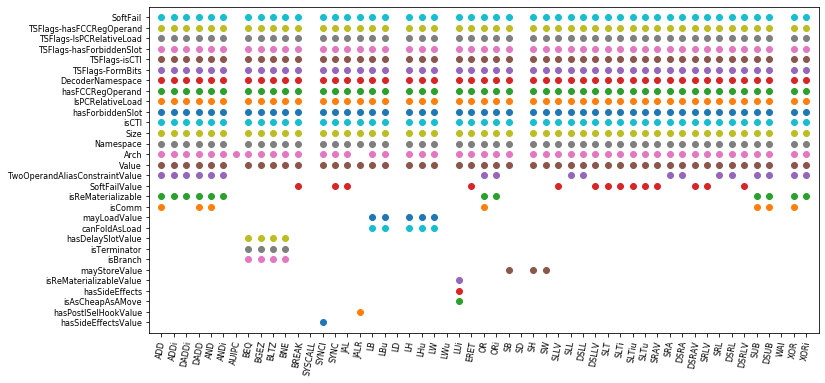

In [11]:
# 开始画图啦啦啦啦啦啦啦啦啦啦啦啦啦啦啦啦啦啦啦啦
import matplotlib.pyplot as plt
points_x, points_y = transform_to_points(inputs_set, inst_names, data_dict)

plt.figure(figsize=(12,6))
dict_points_x, dict_points_y = group_by_y(points_x, points_y)
for key in dict_points_x:
    plt.scatter(dict_points_x[key], dict_points_y[key])

# 所以可以把x轴刻度设置成指令名，y轴刻度设置为输入名
plt.xlim(-1, len(datas_inst_name))  # 左右各留一个白
plt.xticks(range(len(datas_inst_name)), inst_names, rotation=80, fontsize=8)  # Rotation是文字旋转多少度
plt.ylim(-1, len(inputs_set))
plt.yticks(range(len(inputs_set)), inputs_set, fontsize=8)

plt.show()

In [ ]:
X = [1, 2, 3, 4, 5, 10, 11]
Y = [3,   1, 4, 6, 11, 9,8]
plt.plot(X, Y)  # 最基本的图：折线图, (X[i], Y[i]) 是折线图上的每个点，按顺序连接.
plt.scatter(X, Y, color='r') # 散点图， 相对于上面就是不连线
plt.bar(X, Y, alpha=0.5)     # 直方图， 
# 更多看教程https://www.runoob.com/numpy/numpy-matplotlib.html， 
# 还有官方教程https://matplotlib.org/stable/tutorials/introductory/sample_plots.html
# matplotlib有一个升级版，叫做seaborn https://seaborn.pydata.org/examples/index.html,找灵感可以看看，一般上面三种就够用了
plt.show()

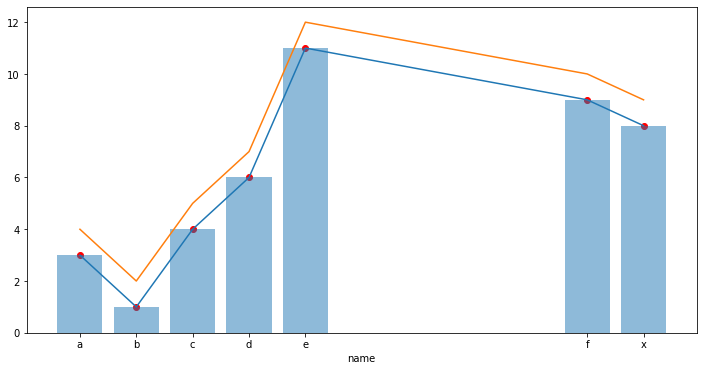

In [7]:
# 二、还有，一些常用的参数，color, fontsize, alpha(透明度), ....不会可以百度
# 三、坐标轴的操作，给坐标上的刻度改名字

plt.figure(figsize=(12, 6)) # 创建一个新图，设置图片分辨率大小，(12, 6)默认是1200x600
X = [1, 2, 3, 4, 5, 10, 11]
Y = [3,   1, 4, 6, 11, 9,8]
Z = [3+1,   1+1, 4+1, 6+1, 11+1, 9+1,8+1]
plt.plot(X, Y)  # 最基本的图：折线图, (X[i], Y[i]) 是折线图上的每个点，按顺序连接.
plt.plot(X, Z)  # 连续画两条线，它自己会选不同的颜色，它有一个颜色库，忘了多少次就会循环回来了，应该几十个还是有的
plt.scatter(X, Y, color='r') # 散点图， 相对于上面就是不连线
plt.bar(X, Y, alpha=0.5)     # 直方图， 

plt.xlabel('name')
plt.xticks(X, ["a", "b", "c", "d", "e", "f", 'x']) 

plt.show()